# Case Study Example: Food Truck Profits

[SAAS Berkeley](https://saas.berkeley.edu/)

Author: Carlos Gonzalez

In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Table of Contents:

- Loading the Data
- Cost Functions
- Gradient Descent

Packages:

- `Pandas` to read our data
- `Numpy` for matrix manipulation
- `Matplotlib` for visualizations 

In this case study, we will explore how simple linear regression can be used to answer a real-world question: *how can we predict the profit a food truck would make in a particular city given the population of that city?* This is incredibly useful information for food truck owners, especially if they're aiming to maximize their profits. While many factors can affect the profitability of a food truck, we will focus on the relationship between population and profit and how we can use data to make predictions.

We are given a dataset that contains information on the population and profit of various food trucks in different cities. This data will allow us to build a simple linear regression model, which will help us understand the relationship between population and profit and make predictions based on this relationship. We will use this model to predict the profit a food truck would make in a new city, where we have information about the population but not the actual profit.

Connecting back to the real-world question, there is a basic solution to this problem involving linear regression to find the optimal values of the parameters (i.e., coefficients) that define the relationship between population and profit. Once we have these parameters, we can use them to make predictions about the profit a food truck would make in a given city. However, a key challenge is determining how to choose the best values for these parameters. How are we sure that the values we chose are optimal? We will be exploring this topic throughout this notebook via an interesting topic called **gradient descent**.

We will be focusing on the theory behind the gradient descent algorithm and how it relates to linear regression. Today, wel will be using clean data to illustrate the key concepts and avoid getting bogged down in data cleaning and collection. This will help us understand the fundamentals of gradient descent and how it can be applied to real-world problems.

We recommend you have familiarity with Linear Regression before starting this notebook. To review, rhis is the statistical method used to model the relationship between the input (independent) variable(s) and the output (dependent) variable. In the case of simple linear regression, there is only one input variable, and the relationship is modeled with a straight line. Check the SAAS Data Science Repository for further information.

# Loading the Data

As a first step, we will be performing linear regression with one variable to make a prediction on the output. In this case, we'll be looking at the population of a city to the profits of the food truck (in 10,000s, respectively).

In [3]:
data = pd.read_csv('gradient.txt', names = ['population', 'profit'])
data.head()

,population,profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


In [31]:
## Split population and profit into X and y
X_df = pd.DataFrame(data["population"])
y_df = pd.DataFrame(data["profit"])

## Length, or number of observations, in our data
l = len(y_df)

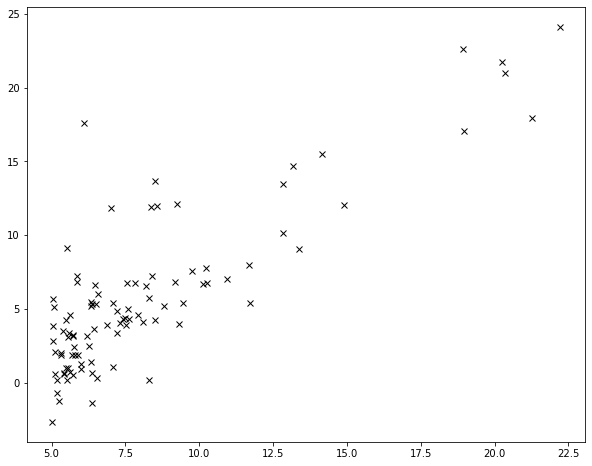

In [32]:
plt.figure(figsize=(10,8))
plt.plot(X_df["population"], y_df["profit"], 'kx')

To recap, the idea of linear regression is to **find a relationship between our target or dependent variable (y) and a set of explanatory variables $(x_1, x_2$ ... $x_n)$.** This relatonship can then be used to predict other values.

In our case with one variable, this relationship is a line defined by parameters $\beta$ and the following form: $y = \beta_{0} + \beta_{1}x$, where $\beta_{0}$ is our intercept.

This can be extended to multivariable regression by extending the equation in vector form: $y = X \beta$

So how do we make the line of best fit? Run the cell below. In this figure, there are many possible lines. Are you able to determine which one is the best?

Text(0, 0.5, 'Profit in $10,000s')

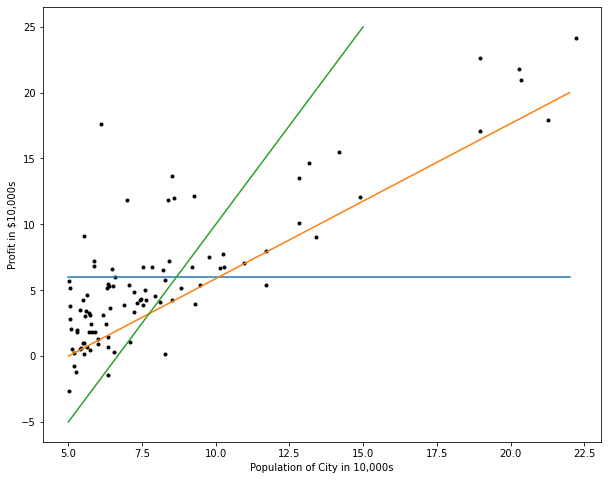

In [33]:
##plotting the data
plt.figure(figsize=(10,8))
plt.plot(X_df["population"], y_df["profit"], 'k.')

##possible lines of fit
plt.plot([5, 22], [6,6], '-')
plt.plot([5, 22], [0,20], '-')
plt.plot([5, 15], [-5,25], '-')

##labels
plt.xlabel('Population of City in 10,000s')
plt.ylabel('Profit in $10,000s')

# Cost Functions

It turns out that to make the best line to model the data, we want to pick parameters $\beta$ that allows our predicted value to be as close to the actual value as possible. In other words, we want the distance or residual between our hypothesis $h(x)$ and y to be minimized.


So we formally define a cost function using ordinary least squares that is simply the sum of the squared distances. To find the liner regression line, we minimize:


$$C(\beta) = \frac{1}{2m}\sum^{m}_{i = 1}(h_{\beta}(x^i)-y^i)^2$$

Once again, the hypothesis that we're trying to find is given by the linear model:

$$h_{\beta}(x) = \beta^{T}x = \beta_{0} + \beta_{1}x_{1}$$

The parameters of the model are the beta values. We adjust $\beta_{c}$ to minimize the cost function $C(\beta)$.

And we can use batch gradient descent where each iteration performs the update

$$\beta_{c} := \beta_{c} - \alpha\frac{1}{m}\sum^{m}_{i = 1}h_{\beta}(x^i)-y^i)x^{i}_{c}$$

This is the idea behind our topic of discussion today: gradient descent.

Gradient Descent is an optimization algorithm that iteratively adjusts the values of the coefficients in the direction of steepest descent of the cost function until the cost function is minimized. The direction of steepest descent is given by the negative gradient of the cost function with respect to the coefficients. The magnitude of the adjustment at each iteration is controlled by the learning rate. Connecting to our specific example of simple linear regresison, we're aiming to find the optimal values of the coefficients that minimize the difference between the predicted profits for the food truck and actual values of the output variable.

Gradient descent is merely an algorithm that makes small steps along a function to find a local minimum. We can look at a simply quadratic equation such as this one:And we can use batch gradient descent where each iteration performs the update


In [54]:
x_quad = [n/10 for n in range(0, 100)]
y_quad = [(n-4)**2+5 for n in x_quad]

#basic quadratic

Text(0.5, 1.0, 'Quadratic Equation')

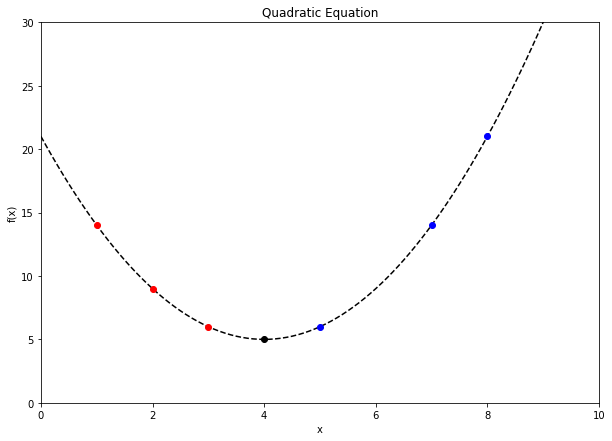

In [55]:
plt.figure(figsize = (10,7))
plt.plot(x_quad, y_quad, 'k--') #dashed lines
plt.axis([0,10,0,30])
plt.plot([1, 2, 3], [14, 9, 6], 'ro') #red dots at given intervals
plt.plot([5, 7, 8],[6, 14, 21], 'bo') #blue ...
plt.plot(4, 5, 'ko') #minimizer
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Quadratic Equation')

We're trying to find the local minimum on this function. If we start at the first red dot at $x = 2$, we find the gradient and we move against it. In this case, the gradient is the slope. And since the slope is negative, our next attempt is further to the right. Thus bringing us closer to the minimum.

Indeed, we keep updating our parameter beta to get us closer and closer to the minumum.

$$\beta_{c} := \beta_{c} - \alpha\frac{\partial }{\partial \beta_{c}}C(\beta)$$

Where $\alpha$ is our learning rate, and $C(\beta)$ is our cost function. By adjusting $\alpha$, we can change how quickly we converge on the minimum value.

Why would that matter? Well, we run the risk of overshooting our goal and thus will not converge at the minimum.

The homework that you will be assigned this week will go over conceptually how to derive these equations, but lets explore how to implement this in Python for now.

We first need to declare some parameters. Let's define our learning rate as `alpha` and our iterations as `iterations`. We want to define how many times we perform a particular update.

In [36]:
iterations = 2000
alpha = 0.01

Next, we are going to transform our data frame into an array to perform some matrix multiplication. We will do this by writing out a helper function to calculate the cost function (see above). We will accomplish this step using `np.dot`.

In [37]:
##Add another column for X, which will serve as our intercept
X_df["intercept"] = 1

##Transform our two dataframes ,X and y, into arrays, and initialize our parameter theta to 0.
X = np.array(X_df)
y = np.array(y_df).flatten()
theta = np.array([0,0])

In [38]:
def cost_function(X, y, theta):
    '''
    compute the cost of using theta as the parameter for linear regression to
    fit the data points into X and y.
    '''
    
    ##get the number of training examples
    l = len(y)
    
    ##calculate the cost with the given parameters
    C = np.sum((X.dot(theta) - y)**2)/2/m
    return C

This cost function will calculate the sum of squared errors (SSE) between the predicted and actual values of the output variable given the input variable and the current coefficients (theta)

In [39]:
cost_function(X, y, theta)

32.072733877455676

Let us split the algorithm into four different parts to see what exactly is going on.

In [40]:
def gradient_descent(X, y, theta, alpha, iterations):
    '''
    perform the gradient descent algorithm to learn the optimal value for theta
    theta = gradient_descent(X, y, theta, iterations - i)
    where theta gets updates by taking iterations - i gradient steps given the learning rate alpha
    '''
    
    final_cost = [0]*iterations
    
    for iteration in range(iterations):
        hypothesis = X.dot(theta)
        loss = hypothesis - y
        gradient = X.T.dot(loss) / m
        theta = theta - alpha*gradient
        cost = cost_function(X, y, theta)
        final_cost[iteration] = cost
        
    return theta, final_cost

In [41]:
(t, c) = gradient_descent(X, y, theta, alpha, iterations)


print(t, "theta parameters")
print(np.array([3.5, 1]).dot(t), np.array([7, 1]).dot(t), "predictions")

[ 1.18221277 -3.78806857] theta parameters
0.349676138927709 4.487420850578528 predictions


In [42]:
#plot best fit line

best_fit_x = np.linspace(0, 25, 20)
best_fit_y = [t[1] + t[0]*x for x in best_fit_x]

Text(0.5, 1.0, 'Profit vs Population With Linear Regression Line of Best Fit')

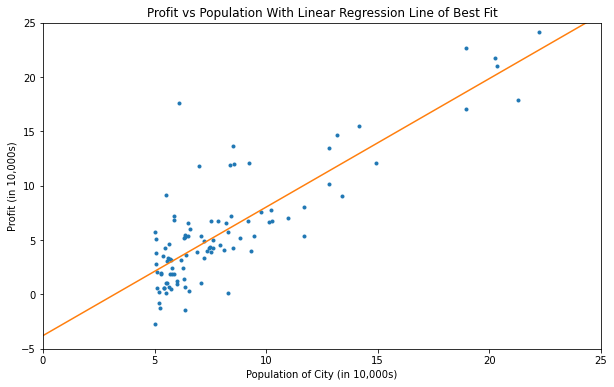

In [43]:
plt.figure(figsize = (10, 6))
plt.plot(X_df["population"], y_df["profit"], ".")
plt.plot(best_fit_x, best_fit_y, "-")
plt.axis([0, 25, -5, 25])
plt.xlabel("Population of City (in 10,000s)")
plt.ylabel("Profit (in 10,000s)")
plt.title("Profit vs Population With Linear Regression Line of Best Fit")

We did a lot today. We started with a real-world problem of predicting the profit a food truck would make in a particular city, given information on the population of that city; we explored the use of linear regression as a way to model the relationship between population and profit and make predictions based on this relationship; we built a linear regression model using the data on population and profit of various food trucks in different cities, and used this model to predict the profit a food truck would make in a new city; we explored the use of gradient descent as an optimization algorithm to help us find the best values for these parameters by iteratively adjusting them until we reach the optimal solution; we optimized our parameter theta to yield the best results!

Great job on finishing this notebook!